In [1]:
import pandas as pd
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.util import ngrams

In [2]:
import pandas as pd

# Load datasets
X_train = pd.read_csv("X_train.csv")  # Peptide sequences
train_labels = pd.read_csv("label_train.csv")  # Corresponding labels

# Combine features and labels
train_data = pd.concat([X_train, train_labels], axis=1)
train_data.columns = ['peptide_sequence', 'label']

# Load test data
X_test = pd.read_csv("X_test.csv")
test_labels = pd.read_csv("label_test.csv")
test_data = pd.concat([X_test, test_labels], axis=1)
test_data.columns = ['peptide_sequence', 'label']

In [3]:
# Helper function to generate gapped n-grams
def generate_gapped_ngrams(text, n, gap=1):
    tokens = list(text)  # Split into characters
    ngram_list = []
    for i in range(len(tokens) - n * gap):
        ngram = [tokens[i + j * gap] for j in range(n)]
        ngram_list.append(''.join(ngram))
    return ngram_list

In [4]:
# TF-IDF vectorization for monogram, bigram, and trigram
# Define different TF-IDF vectorizers with varying n-gram ranges and custom tokenizers
vectorizers = {
    "monogram": TfidfVectorizer(analyzer='char', ngram_range=(1, 1)),
    "bigram": TfidfVectorizer(analyzer='char', ngram_range=(2, 2)),
    "trigram": TfidfVectorizer(analyzer='char', ngram_range=(3, 3)),
    "gapped_bigram": TfidfVectorizer(analyzer='char', ngram_range=(2, 2), tokenizer=lambda text: generate_gapped_ngrams(text, 2, gap=1)),
    "gapped_trigram": TfidfVectorizer(analyzer='char', ngram_range=(3, 3), tokenizer=lambda text: generate_gapped_ngrams(text, 3, gap=1)),
}

In [5]:

# Feature extraction for each vectorizer
X_train = {key: vectorizer.fit_transform(train_data['peptide_sequence']) for key, vectorizer in vectorizers.items()}
X_test = {key: vectorizer.transform(test_data['peptide_sequence']) for key, vectorizer in vectorizers.items()}

y_train = train_data['label']
y_test = test_data['label']

C:\Users\20301207\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\20301207\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:556: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [6]:
print(X_train['monogram'])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 29209 stored elements and shape (2872, 20)>
  Coords	Values
  (0, 2)	0.5670184716702382
  (0, 14)	0.390273295011413
  (0, 6)	0.2568293457178752
  (0, 8)	0.18048161652917083
  (0, 7)	0.18154025019077416
  (0, 17)	0.3229347885884526
  (0, 11)	0.19199226694539678
  (0, 13)	0.4254742254751707
  (0, 19)	0.21026110956069005
  (0, 5)	0.1682232440378221
  (1, 14)	0.22529579289485227
  (1, 8)	0.20837576856338644
  (1, 7)	0.20959801827006508
  (1, 17)	0.1864228226177742
  (1, 11)	0.4433308716127079
  (1, 5)	0.1942228158231376
  (1, 3)	0.2082136385077254
  (1, 12)	0.21571032863728648
  (1, 16)	0.6207707727992431
  (1, 15)	0.19284279278500263
  (1, 4)	0.22584890396286417
  (1, 9)	0.17156775675890173
  (2, 2)	0.21240389187094535
  (2, 14)	0.43858659406389533
  (2, 7)	0.2040137540395908
  :	:
  (2869, 11)	0.606617810455274
  (2869, 19)	0.22144665153254559
  (2869, 15)	0.17591356736301353
  (2869, 9)	0.31301243567423964
  (2869, 0)	0.16707

In [7]:
for key in vectorizers.keys():
    print(f"TF-IDF Matrix for {key} model:")
    print(f"Shape of TF-IDF Matrix ({key}): {X_train[key].shape}")
    print(X_train[key].toarray())  # Print the dense matrix
    print("\n" + "="*80 + "\n")

TF-IDF Matrix for monogram model:
Shape of TF-IDF Matrix (monogram): (2872, 20)
[[0.         0.         0.56701847 ... 0.32293479 0.         0.21026111]
 [0.         0.         0.         ... 0.18642282 0.         0.        ]
 [0.         0.         0.21240389 ... 0.18145601 0.         0.23629007]
 ...
 [0.16707724 0.         0.39812194 ... 0.34011438 0.         0.22144665]
 [0.         0.34633932 0.42066909 ... 0.35937635 0.         0.        ]
 [0.35908929 0.         0.14261002 ... 0.12183131 0.         0.        ]]


TF-IDF Matrix for bigram model:
Shape of TF-IDF Matrix (bigram): (2872, 400)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


TF-IDF Matrix for trigram model:
Shape of TF-IDF Matrix (trigram): (2872, 7009)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


T

In [8]:
# Example: Train and evaluate a classifier with the monogram model
clf = RandomForestClassifier(random_state=42, n_estimators=100)
# Train/test split for internal validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train["monogram"], y_train, test_size=0.2, random_state=42)

In [9]:
# Train the model
clf.fit(X_train_split, y_train_split)

RandomForestClassifier(random_state=42)

In [10]:
# Evaluate on validation set
y_val_pred = clf.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
print(f"Validation Accuracy (Monogram): {accuracy_val}")
print(f"Validation MCC (Monogram): {mcc_val}")

Validation Accuracy (Monogram): 0.6573913043478261
Validation MCC (Monogram): 0.2811532891331228


In [11]:
# Test Phase (using monogram features here)
y_test_pred = clf.predict(X_test["monogram"])
accuracy_test = accuracy_score(y_test, y_test_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)

[[131  40]
 [100  71]]


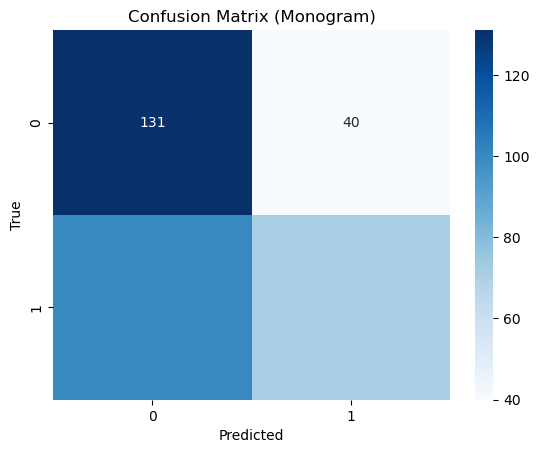

In [12]:
# Confusion Matrix for monogram
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Monogram)")
plt.show()

In [13]:
print(f"Test Accuracy (Monogram): {accuracy_test}")
print(f"Test MCC (Monogram): {mcc_test}")

Test Accuracy (Monogram): 0.5906432748538012
Test MCC (Monogram): 0.19359503474789191


In [14]:
# Select one sample from the test data (e.g., first sample)
sample_peptide = test_data['peptide_sequence'].iloc[0]  # You can change the index to test any other sample

# Vectorize the sample using the same TF-IDF vectorizer used for training
sample_tfidf = vectorizers["monogram"].transform([sample_peptide])

# Predict the label for the sample
sample_prediction = clf.predict(sample_tfidf)

# Output the sample, its predicted label, and the corresponding true label
print(f"Sample Peptide Sequence: {sample_peptide}")
print(f"Predicted Label: {sample_prediction[0]}")
print(f"True Label: {y_test.iloc[0]}")

# For a more detailed output, you can also print the probability (confidence level) of the prediction
sample_prediction_proba = clf.predict_proba(sample_tfidf)
print(f"Prediction Probability (Class 1): {sample_prediction_proba[0][1]}")
print(f"Prediction Probability (Class 0): {sample_prediction_proba[0][0]}")

Sample Peptide Sequence: TPETLFEIGSVSKTFTAT
Predicted Label: 0
True Label: 1
Prediction Probability (Class 1): 0.45
Prediction Probability (Class 0): 0.55
